<a href="https://colab.research.google.com/github/Gamearonx/EDA/blob/main/KC_50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/EDA Assignment Files/Assignments/50_Startups.csv")

In [6]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.info(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


(None,)

# Duplicates

In [8]:
duplicate_count = df.duplicated().sum()

df_encoded = df.copy()
df_encoded['State'] = df_encoded['State'].astype('category').cat.codes

# Display results
duplicate_count, df_encoded.head()


(0,
    R&D Spend  Administration  Marketing Spend  State     Profit
 0  165349.20       136897.80        471784.10      2  192261.83
 1  162597.70       151377.59        443898.53      0  191792.06
 2  153441.51       101145.55        407934.54      1  191050.39
 3  144372.41       118671.85        383199.62      2  182901.99
 4  142107.34        91391.77        366168.42      1  166187.94)

# Outliers

In [9]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df_encoded, ['Administration', 'Marketing Spend'])

# Display the new shape of the dataset
df_cleaned.shape


(50, 5)

# Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Retry Normalization
scaler = MinMaxScaler()
df_normalized = df_cleaned.copy()
df_normalized[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']] = scaler.fit_transform(
    df_cleaned[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]
)

# Display the normalized data
df_normalized.head()



,R&D Spend,Administration,Marketing Spend,State,Profit
0,1.000000,0.651744,1.000000,2,1.000000
1,0.983359,0.761972,0.940893,0,0.997355
2,0.927985,0.379579,0.864664,1,0.993178
3,0.873136,0.512998,0.812235,2,0.947292
4,0.859438,0.305328,0.776136,1,0.853171


# Visualization

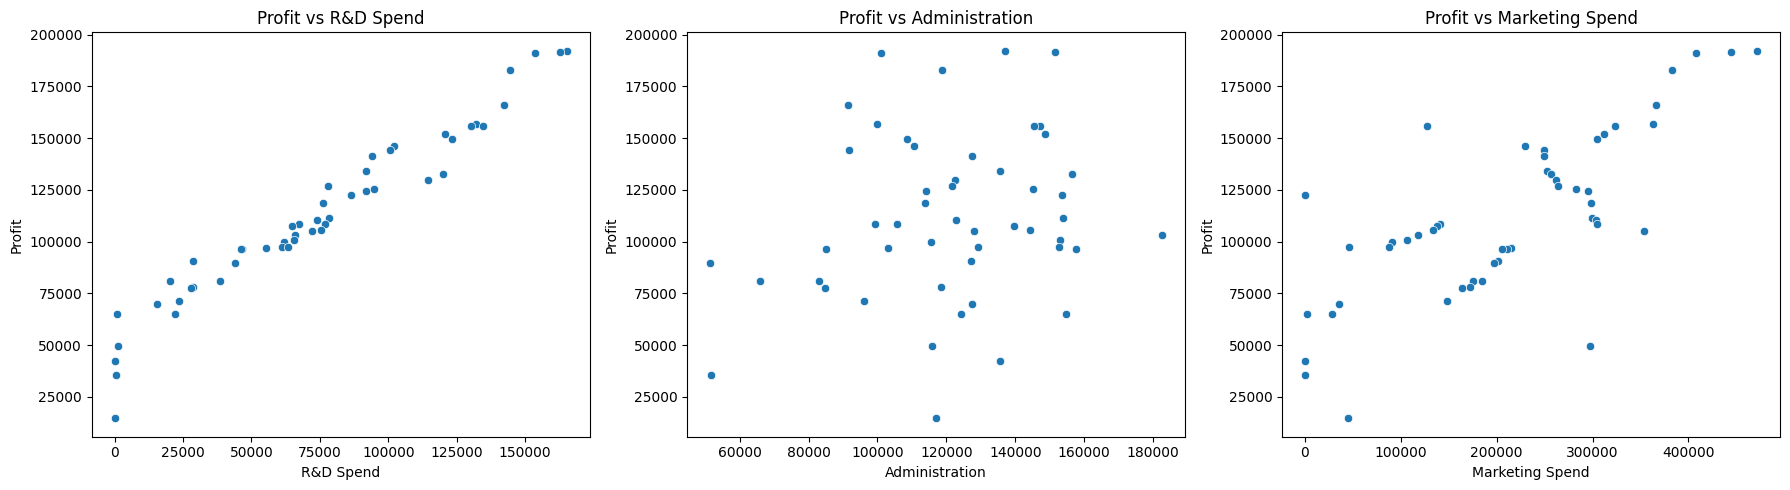

In [12]:
# Relationship between investments and profit
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

investment_cols = ['R&D Spend', 'Administration', 'Marketing Spend']
for i, col in enumerate(investment_cols):
    sns.scatterplot(x=df_cleaned[col], y=df_cleaned['Profit'], ax=axes[i])
    axes[i].set_title(f'Profit vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Profit')

plt.tight_layout()
plt.show()
